In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

df_kingCounty = pd.read_csv("kc_house_data.csv")
df_kingCounty.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
valMedioEsperadoInPrev = df_kingCounty['price'].mean()
print("Valor medio espereado na previsão = ", valMedioEsperadoInPrev)

Valor medio espereado na previsão =  540088.1417665294


In [3]:
df_kingCounty.shape

(21613, 21)

In [4]:
df_kingCounty.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df_kingCounty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
!pip install scipy

In [7]:
df_kingCounty.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df_kingCounty_delDate = df_kingCounty.drop(labels="date",axis=1)

In [9]:
df_kingCounty_delDate.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


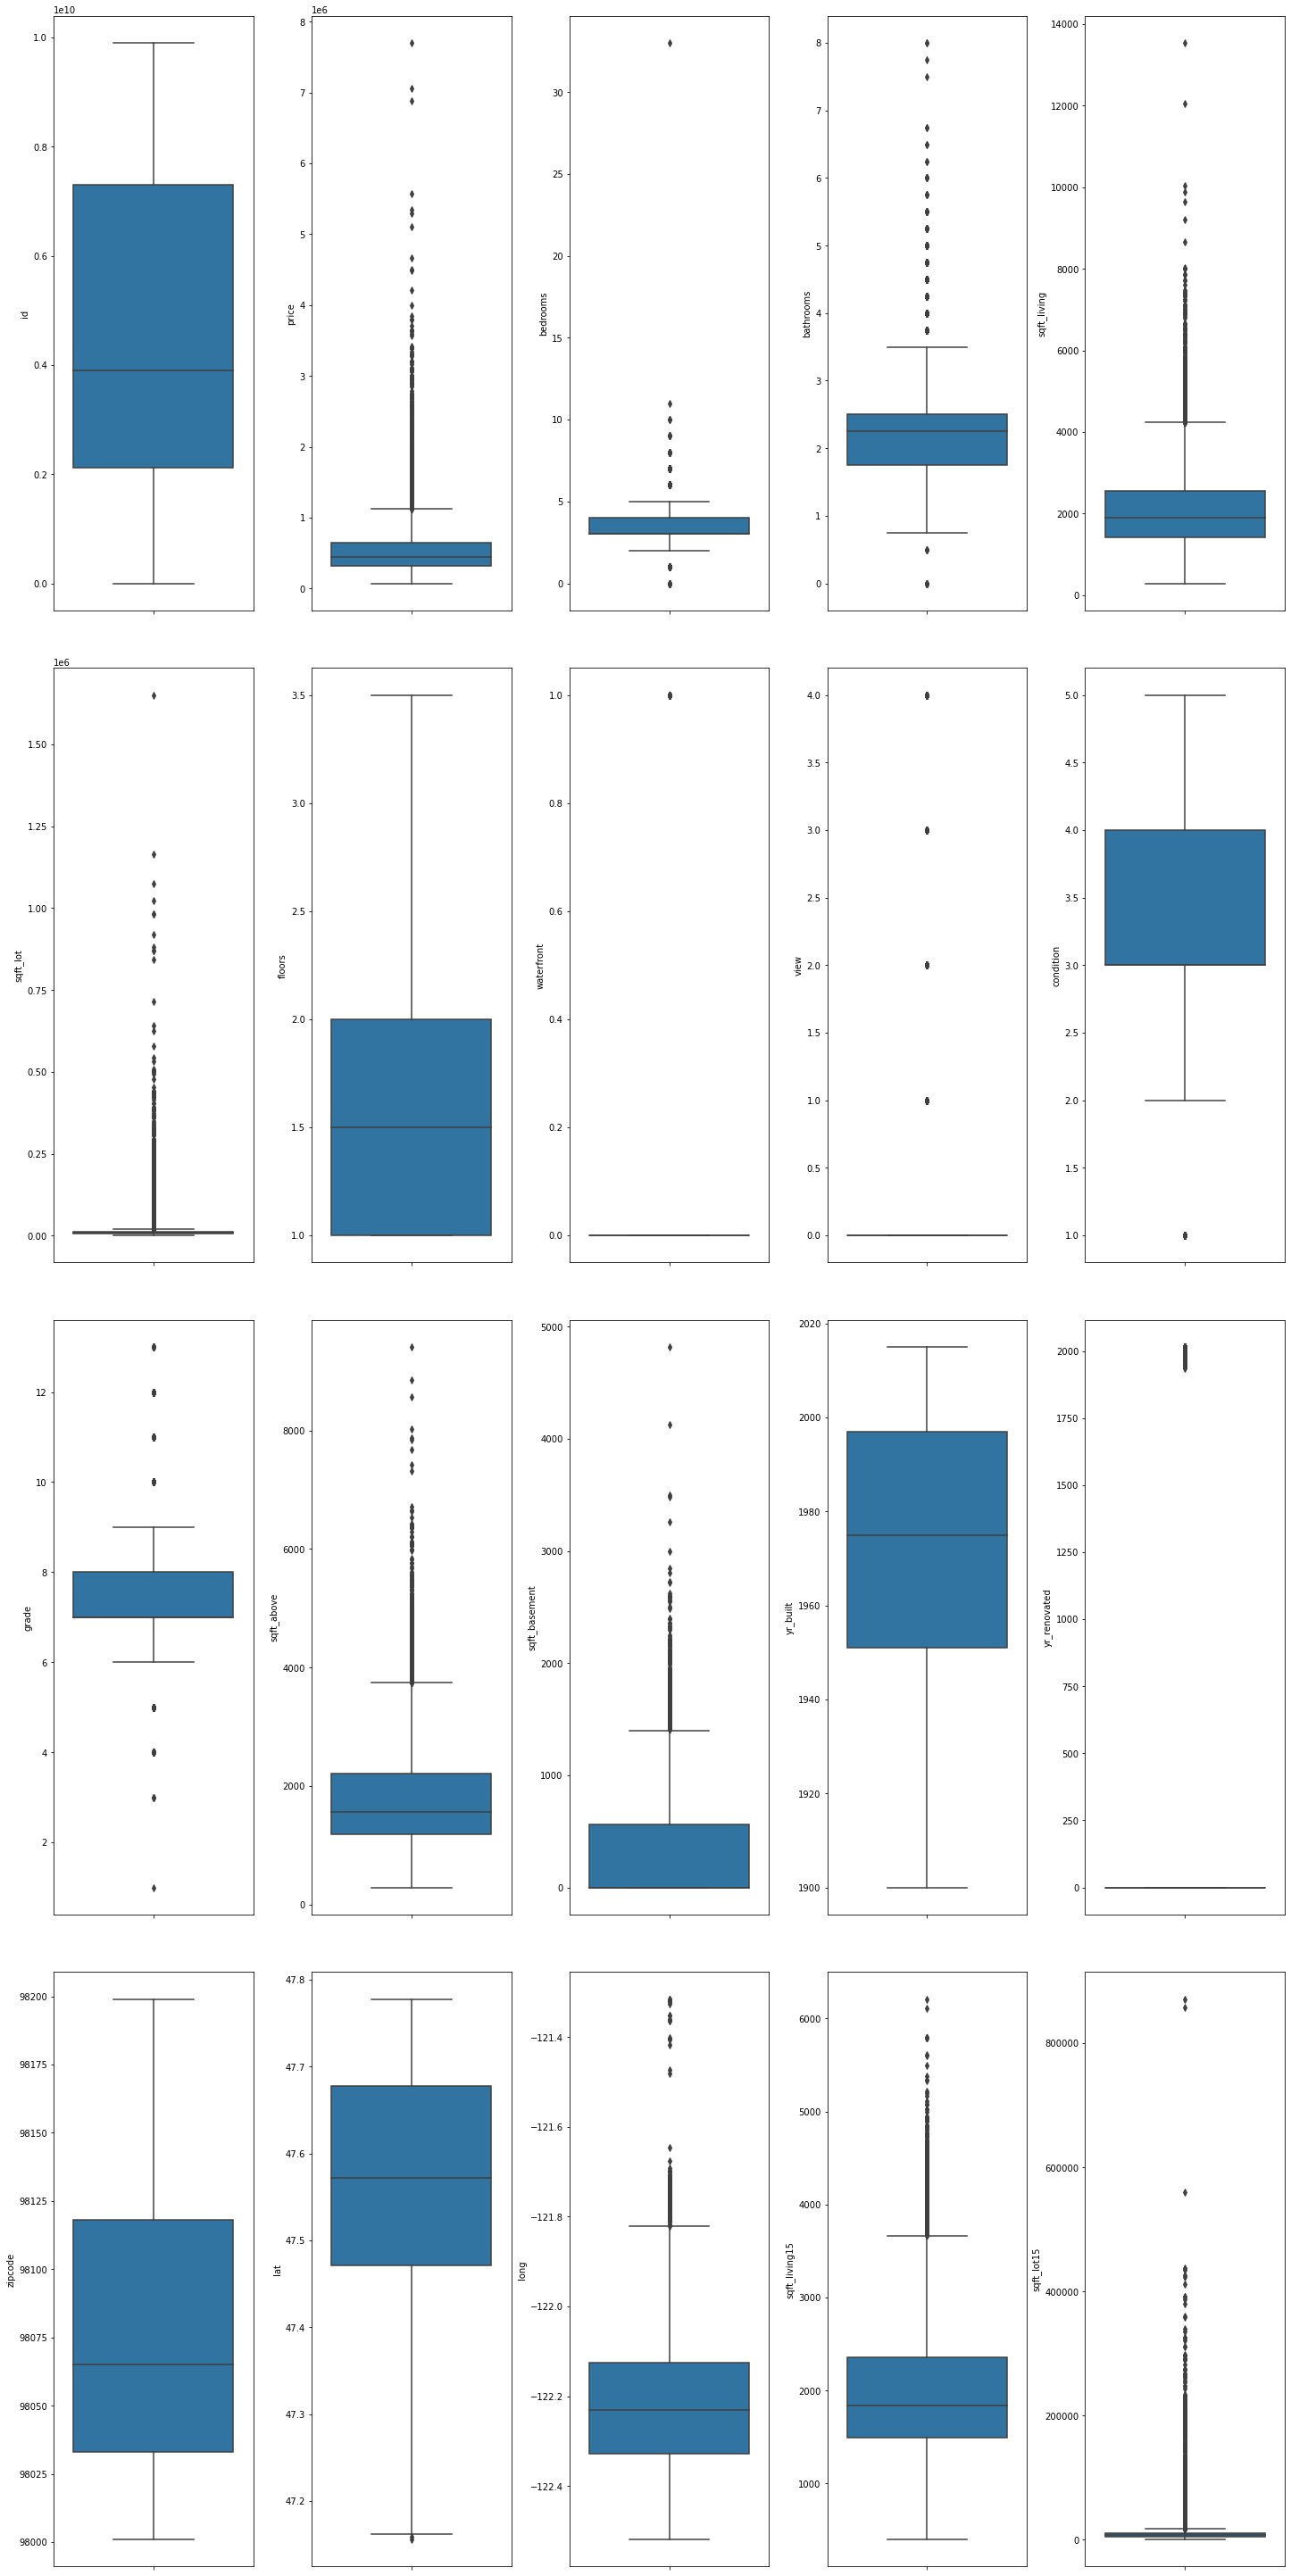

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20,40))
index = 0 
axs = axs.flatten()
for k,v in df_kingCounty_delDate.items():
    sns.boxplot(y=k, data=df_kingCounty, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [11]:
for k,v in df_kingCounty_delDate.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df_kingCounty_delDate)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))


Column id outliers = 0.00%
Column price outliers = 5.30%
Column bedrooms outliers = 2.53%
Column bathrooms outliers = 2.64%
Column sqft_living outliers = 2.65%
Column sqft_lot outliers = 11.22%
Column floors outliers = 0.04%
Column waterfront outliers = 100.00%
Column view outliers = 100.00%
Column condition outliers = 0.14%
Column grade outliers = 8.84%
Column sqft_above outliers = 2.86%
Column sqft_basement outliers = 2.48%
Column yr_built outliers = 0.00%
Column yr_renovated outliers = 100.00%
Column zipcode outliers = 0.00%
Column lat outliers = 0.01%
Column long outliers = 1.18%
Column sqft_living15 outliers = 2.52%
Column sqft_lot15 outliers = 10.15%


<AxesSubplot:>

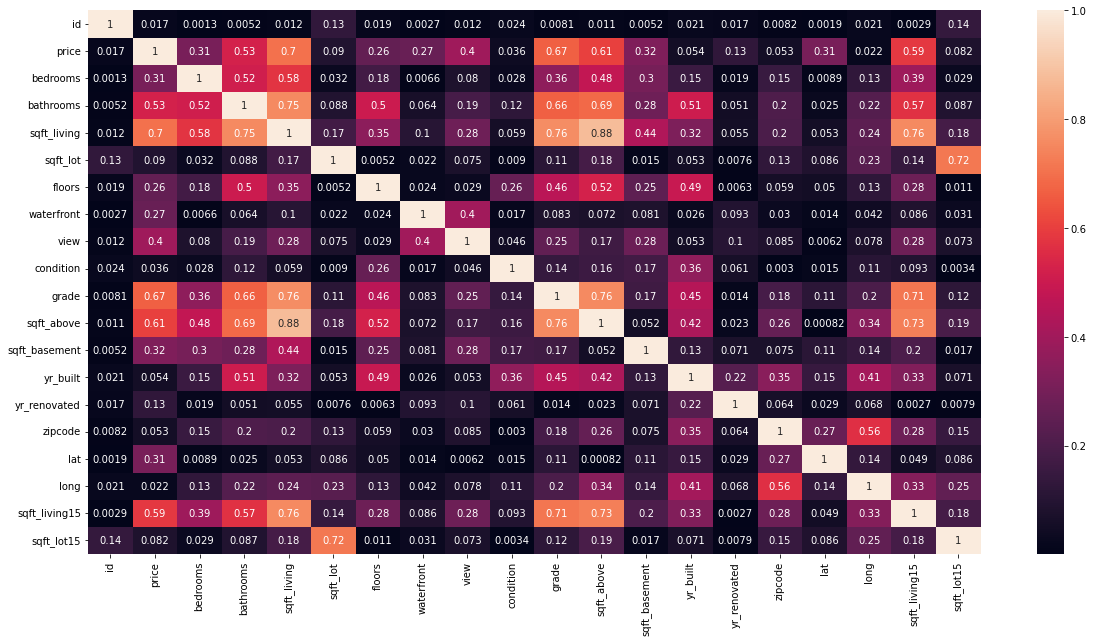

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_kingCounty_delDate.corr().abs(), annot=True)

In [63]:
print("PARTE 1")

PARTE 1


In [13]:
x1 = df_kingCounty['sqft_living']
y1 = df_kingCounty['price']

In [14]:
from sklearn.model_selection import train_test_split
x1_treino, x1_teste, y1_treino, y1_teste = train_test_split(x1, y1, test_size=0.2, random_state=1000)

In [15]:
print(x1_teste,y1_teste)

18099     890
2156     1010
20684    3490
4456     1940
18714    2120
         ... 
10534    2220
7003     2090
2234     2400
13683    2150
10200    2010
Name: sqft_living, Length: 4323, dtype: int64 18099    150000.0
2156     410000.0
20684    630000.0
4456     790000.0
18714    534000.0
           ...   
10534    467000.0
7003     513000.0
2234     608000.0
13683    550000.0
10200    605000.0
Name: price, Length: 4323, dtype: float64


In [16]:
print(x1_treino,y1_treino)

20106    1720
6323     1470
21390    2540
21296    2380
227      1720
         ... 
15611    1680
3776     3180
6215     2010
4695     2870
9651     2570
Name: sqft_living, Length: 17290, dtype: int64 20106    547500.0
6323     376000.0
21390    300000.0
21296    445000.0
227      264950.0
           ...   
15611    275000.0
3776     680000.0
6215     364000.0
4695     646000.0
9651     479950.0
Name: price, Length: 17290, dtype: float64


In [17]:
from sklearn.linear_model import LinearRegression
regressL1 = LinearRegression().fit(x1_treino.values.reshape(-1, 1), y1_treino)
regressL1

LinearRegression()

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
y1_pred = regressL1.predict(x1_teste.values.reshape(-1,1))
print("Previsão: ",y1_pred)

Previsão:  [206482.81540701 240157.92440809 936110.17709721 ... 630227.93700401
 560071.45991841 520783.83275048]


In [19]:
coefiAngu = regressL1.coef_
print("Coeficiente angular: ",coefiAngu)

Coeficiente angular:  [280.62590834]


In [20]:
coefiLine = regressL1.intercept_
print("Coeficiente linear: ",coefiLine)

Coeficiente linear:  -43274.24301771517


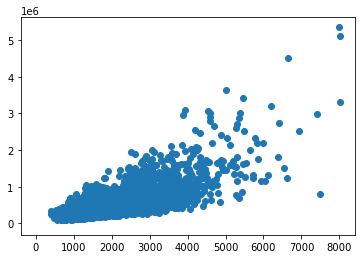

In [21]:
fig, ax = plt.subplots()
ax.scatter(x1_teste,y1_teste)
ax.plot(coefiAngu + coefiLine,'--r')
plt.show()

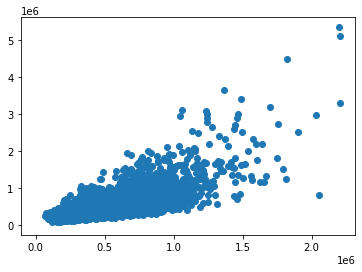

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y1_pred,y1_teste)
ax.plot([5,0.2],[3.5,0],'--r')
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score, mean_squared_error

r2_1 = r2_score(y1_teste,y1_pred)
print(f"Error Quadratico (r2) = {r2_1:.4f}")

mae_1 = mean_absolute_error(y1_teste, y1_pred)
print(f"Error Médio Absoluto (MAE) = {mae_1:.4f}")

mape_1 = mean_absolute_percentage_error(y1_teste,y1_pred)
print(f"Erro Percentual Absoluto Médio (MAPE) = {mape_1:.4f}")

mse_1 = mean_squared_error(y1_teste,y1_pred)
print(f"Erro Médio Quadratico (MSE1) = {mse_1:.4f}%")

Error Quadratico (r2) = 0.4966
Error Médio Absoluto (MAE) = 172025.3473
Erro Percentual Absoluto Médio (MAPE) = 0.3615
Erro Médio Quadratico (MSE1) = 65914191043.4462%


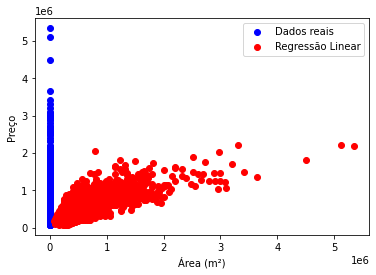

In [24]:
plt.scatter(x1_teste, y1_teste, color='blue', label="Dados reais")
plt.scatter(y1_teste, y1_pred, color='red', label="Regressão Linear")
plt.xlabel("Área (m²)")
plt.ylabel("Preço")
plt.legend()
plt.show()

In [25]:
df_kingCounty.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [62]:
print("PARTE 1")

PARTE 1


In [26]:
x2 = df_kingCounty[["sqft_living","price","sqft_above"]]
x2

,sqft_living,price,sqft_above
0,1180,221900.0,1180
1,2570,538000.0,2170
2,770,180000.0,770
3,1960,604000.0,1050
4,1680,510000.0,1680
...,...,...,...
21608,1530,360000.0,1530
21609,2310,400000.0,2310
21610,1020,402101.0,1020
21611,1600,400000.0,1600


In [27]:
y2 = df_kingCounty["price"]
y2

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

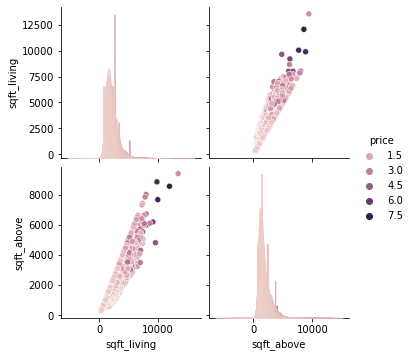

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(x2, hue="price")
plt.show

<AxesSubplot:>

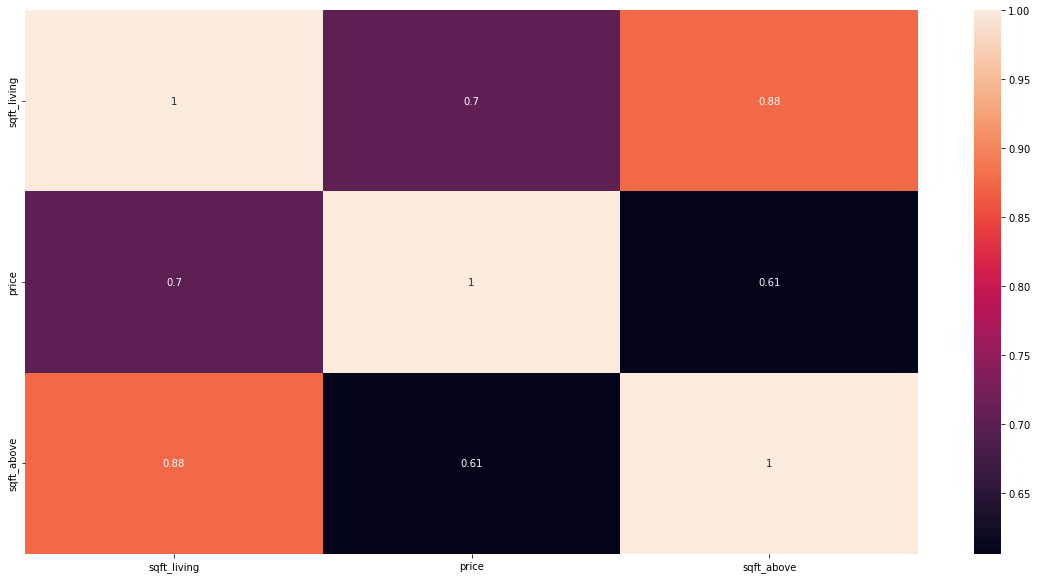

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(x2.corr().abs(), annot=True)

In [30]:
x2_treino, x2_teste, y2_treino, y2_teste = train_test_split(x2, y2, test_size=0.2, random_state=42)
x2_treino

,sqft_living,price,sqft_above
6325,1780,325000.0,1780
13473,1000,257000.0,800
17614,1080,228500.0,990
16970,2090,288000.0,1280
20868,1741,479000.0,1446
...,...,...,...
11964,1000,378000.0,1000
21575,3087,399950.0,3087
5390,2120,575000.0,2120
860,380,245000.0,380


In [31]:
y2_treino

6325     325000.0
13473    257000.0
17614    228500.0
16970    288000.0
20868    479000.0
           ...   
11964    378000.0
21575    399950.0
5390     575000.0
860      245000.0
15795    315000.0
Name: price, Length: 17290, dtype: float64

In [32]:
regressL2 = LinearRegression().fit(x2_treino,y2_treino)
regressL2

LinearRegression()

In [33]:
coefiAngu2 = regressL2.coef_
coefiAngu2

array([ 3.82023848e-13,  1.00000000e+00, -1.29974156e-15])

In [34]:
y2_pred =regressL2.predict(x2_teste)
y2_pred

array([ 365000.,  865000., 1038000., ...,  285000.,  605000.,  356500.])

In [56]:
y2_pred =regressL2.predict(x2_teste)
y2_pred

array([ 365000.,  865000., 1038000., ...,  285000.,  605000.,  356500.])

In [50]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score, mean_squared_error

r2_2 = r2_score(y2_teste,y_pred)
print(f"Error Quadratico (r2) = {r2_2:.4f}")

mae_2 = mean_absolute_error(y2_teste, y2_pred)
print(f"Error Médio Absoluto (MAE) = {mae_2:.4f}")

mape_2 = mean_absolute_percentage_error(y2_teste,y2_pred)
print(f"Erro Percentual Absoluto Médio (MAPE) = {mape_2:.4f}")

mse_2 = mean_squared_error(y2_teste,y2_pred)
print(f"Erro Médio Quadratico (MSE1) = {mse_2:.4f}%")

Error Quadratico (r2) = 1.0000
Error Médio Absoluto (MAE) = 0.0000
Erro Percentual Absoluto Médio (MAPE) = 0.0000
Erro Médio Quadratico (MSE1) = 0.0000%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


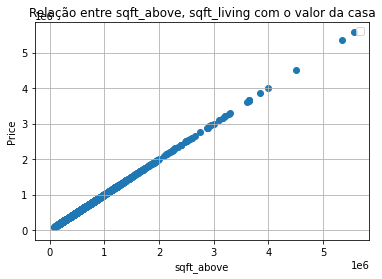

In [36]:
fig, ax = plt.subplots()

ax.scatter(y2_pred,y2_teste)
ax.plot([1,5],[1,5],'--r')

plt.xlabel("sqft_above")
plt.ylabel("Price")
plt.title("Relação entre sqft_above, sqft_living com o valor da casa")

plt.grid(True)
plt.legend()

plt.show()

In [61]:
print("PARTE 3")

PARTE 3


In [44]:
x3 = df_kingCounty[["sqft_living","price","sqft_above","grade"]]
x3

,sqft_living,price,sqft_above,grade
0,1180,221900.0,1180,7
1,2570,538000.0,2170,7
2,770,180000.0,770,6
3,1960,604000.0,1050,7
4,1680,510000.0,1680,8
...,...,...,...,...
21608,1530,360000.0,1530,8
21609,2310,400000.0,2310,8
21610,1020,402101.0,1020,7
21611,1600,400000.0,1600,8


In [45]:
y3 = df_kingCounty[["price"]]
y3

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


<function matplotlib.pyplot.show(close=None, block=None)>

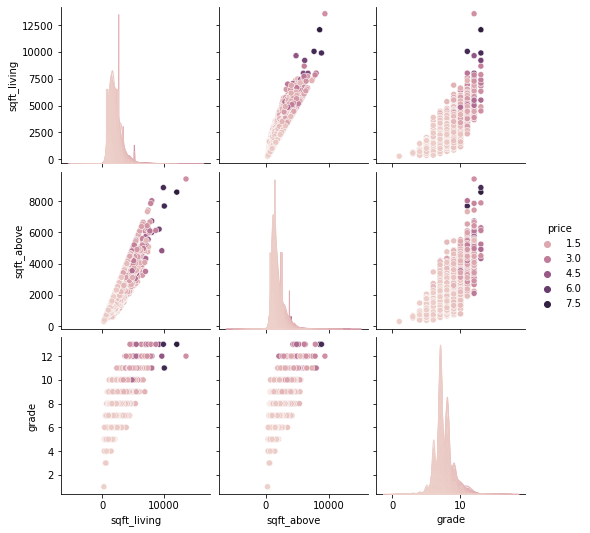

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(x3, hue="price")
plt.show

<AxesSubplot:>

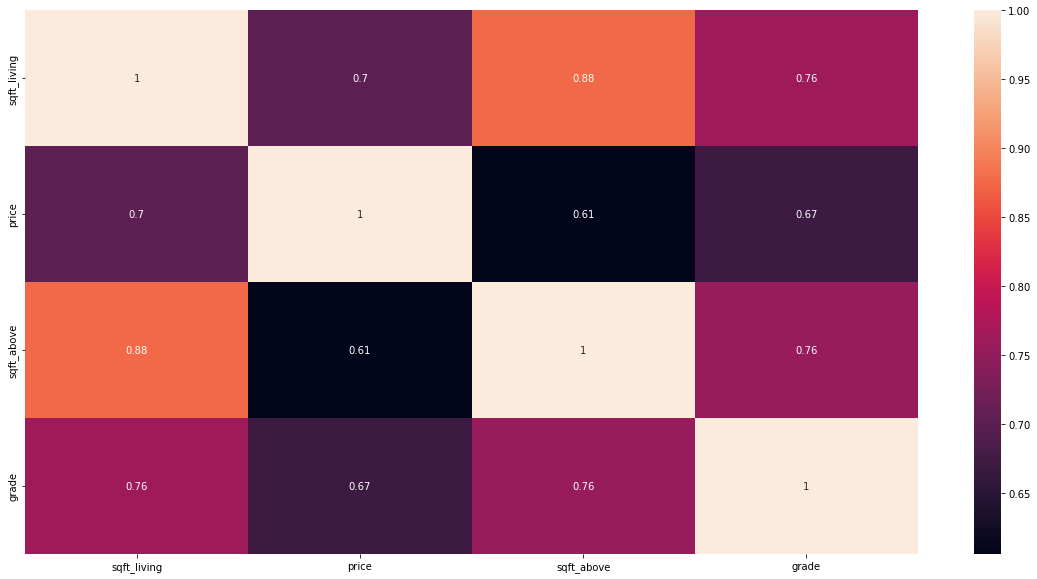

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(x3.corr().abs(), annot=True)

In [41]:
x3.columns

Index(['sqft_living', 'price', 'sqft_above', 'grade'], dtype='object')

In [46]:
y3

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [47]:
x3_treino, x3_teste, y3_treino, y3_teste = train_test_split(x3, y3, test_size=0.2, random_state=42)
x3_treino

,sqft_living,price,sqft_above,grade
6325,1780,325000.0,1780,9
13473,1000,257000.0,800,6
17614,1080,228500.0,990,6
16970,2090,288000.0,1280,7
20868,1741,479000.0,1446,8
...,...,...,...,...
11964,1000,378000.0,1000,7
21575,3087,399950.0,3087,8
5390,2120,575000.0,2120,7
860,380,245000.0,380,5


In [48]:
y3_treino

,price
6325,325000.0
13473,257000.0
17614,228500.0
16970,288000.0
20868,479000.0
...,...
11964,378000.0
21575,399950.0
5390,575000.0
860,245000.0


In [52]:
regressL3 = LinearRegression().fit(x3_treino,y3_treino)
regressL3

LinearRegression()

In [53]:
coefiAngu3 = regressL3.coef_
coefiAngu3

array([[ 3.75071322e-13,  1.00000000e+00,  8.37871439e-16,
        -3.89431173e-12]])

In [57]:
y3_pred =regressL3.predict(x3_teste)
y3_pred

array([[ 365000.],
       [ 865000.],
       [1038000.],
       ...,
       [ 285000.],
       [ 605000.],
       [ 356500.]])

In [58]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score, mean_squared_error

r2_3 = r2_score(y3_teste,y3_pred)
print(f"Error Quadratico (r2) = {r2_3:.4f}")

mae_3 = mean_absolute_error(y3_teste, y3_pred)
print(f"Error Médio Absoluto (MAE) = {mae_3:.4f}")

mape_3 = mean_absolute_percentage_error(y3_teste,y3_pred)
print(f"Erro Percentual Absoluto Médio (MAPE) = {mape_3:.4f}")

mse_3 = mean_squared_error(y3_teste,y3_pred)
print(f"Erro Médio Quadratico (MSE1) = {mse_3:.4f}%")

Error Quadratico (r2) = 1.0000
Error Médio Absoluto (MAE) = 0.0000
Erro Percentual Absoluto Médio (MAPE) = 0.0000
Erro Médio Quadratico (MSE1) = 0.0000%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


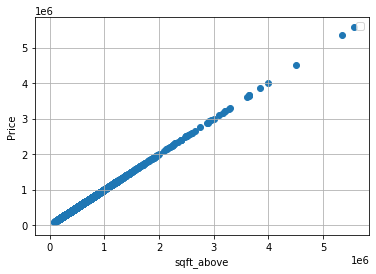

In [60]:
fig, ax = plt.subplots()

ax.scatter(y3_pred,y3_teste)
ax.plot([1,5],[1,5],'--r')

plt.xlabel("sqft_above")
plt.ylabel("Price")

plt.grid(True)
plt.legend()

plt.show()